## Proyecto Final IA

## Librerías

In [1]:
import os
import cv2
import numpy as np

import matplotlib.pyplot as plt
from patchify import patchify
from PIL import Image

from tensorflow.keras.metrics import MeanIoU
#import segmentation_models as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Path del dataset

In [2]:
rootPath = 'Semantic segmentation dataset/'

## Patch Size

In [7]:
patchSize = 256

In [10]:
scaler = MinMaxScaler()

## Read images and their respective masks

In [18]:
imageDataset = []

for path, subdirs, files in os.walk(rootPath):
    dirName = path.split(os.path.sep)[-1]
    if dirName == 'images':
        images = os.listdir(path)
        for i, imageName in enumerate(images):
            if imageName.endswith(".jpg"):
                
                image = cv2.imread(path + "/" + imageName, 1)
                xSize = (image.shape[1] // patchSize) * patchSize
                ySize = (image.shape[0] // patchSize) * patchSize
                image = Image.fromarray(image)
                image = image.crop((0,0, xSize, ySize))
                image = np.array(image)
                
                print("Patchifying image:", path + "/" + imageName)
                patchesImg = patchify(image, (patchSize, patchSize, 3), step=patchSize)
                
                for i in range(patchesImg.shape[0]):
                    for j in range(patchesImg.shape[1]):
                        
                        singePatchImg = patchesImg[i, j, :, :]
                        
                        singePatchImg = scaler.fit_transform(singePatchImg.reshape(-1,
                                        singePatchImg.shape[-1])).reshape(singePatchImg.shape)
                        
                        singePatchImg = singePatchImg[0]
                        imageDataset.append(singePatchImg)
                        
maskDataset = []

for path, subdirs, files in os.walk(rootPath):
    dirName = path.split(os.path.sep)[-1]
    if dirName == 'masks':
        masks = os.listdir(path)
        for i, maskName in enumerate(masks):
            if maskName.endswith(".png"):
                
                mask = cv2.imread(path + "/" + maskName, 1)
                mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                xSize = (mask.shape[1] // patchSize) * patchSize
                ySize = (mask.shape[0] // patchSize) * patchSize
                mask = Image.fromarray(mask)
                mask = mask.crop((0,0, xSize, ySize))
                mask = np.array(mask)
                
                print("Patchifying mask:", path + "/" + maskName)
                patchesMask = patchify(mask, (patchSize, patchSize, 3), step=patchSize)
                
                for i in range(patchesMask.shape[0]):
                    for j in range(patchesMask.shape[1]):
                        
                        singePatchMask = patchesMask[i, j, :, :]
                        
                        singePatchMask = singePatchMask[0]
                        maskDataset.append(singePatchMask)
                        
imageDataset = np.array(imageDataset)
maskDataset = np.array(maskDataset)

Patchifying image: Semantic segmentation dataset/Tile 1\images/image_part_001.jpg
Patchifying image: Semantic segmentation dataset/Tile 1\images/image_part_002.jpg
Patchifying image: Semantic segmentation dataset/Tile 1\images/image_part_003.jpg
Patchifying image: Semantic segmentation dataset/Tile 1\images/image_part_004.jpg
Patchifying image: Semantic segmentation dataset/Tile 1\images/image_part_005.jpg
Patchifying image: Semantic segmentation dataset/Tile 1\images/image_part_006.jpg
Patchifying image: Semantic segmentation dataset/Tile 1\images/image_part_007.jpg
Patchifying image: Semantic segmentation dataset/Tile 1\images/image_part_008.jpg
Patchifying image: Semantic segmentation dataset/Tile 1\images/image_part_009.jpg
Patchifying image: Semantic segmentation dataset/Tile 2\images/image_part_001.jpg
Patchifying image: Semantic segmentation dataset/Tile 2\images/image_part_002.jpg
Patchifying image: Semantic segmentation dataset/Tile 2\images/image_part_003.jpg
Patchifying imag

In [14]:
imageDataset.shape

(1305, 256, 256, 3)

In [19]:
maskDataset

array([[[[132,  41, 246],
         [132,  41, 246],
         [132,  41, 246],
         ...,
         [132,  41, 246],
         [132,  41, 246],
         [132,  41, 246]],

        [[132,  41, 246],
         [132,  41, 246],
         [132,  41, 246],
         ...,
         [132,  41, 246],
         [132,  41, 246],
         [132,  41, 246]],

        [[132,  41, 246],
         [132,  41, 246],
         [132,  41, 246],
         ...,
         [132,  41, 246],
         [132,  41, 246],
         [132,  41, 246]],

        ...,

        [[132,  41, 246],
         [132,  41, 246],
         [132,  41, 246],
         ...,
         [132,  41, 246],
         [132,  41, 246],
         [132,  41, 246]],

        [[132,  41, 246],
         [132,  41, 246],
         [132,  41, 246],
         ...,
         [132,  41, 246],
         [132,  41, 246],
         [132,  41, 246]],

        [[132,  41, 246],
         [132,  41, 246],
         [132,  41, 246],
         ...,
         [132,  41, 246],
        

## Images check

In [15]:
import random

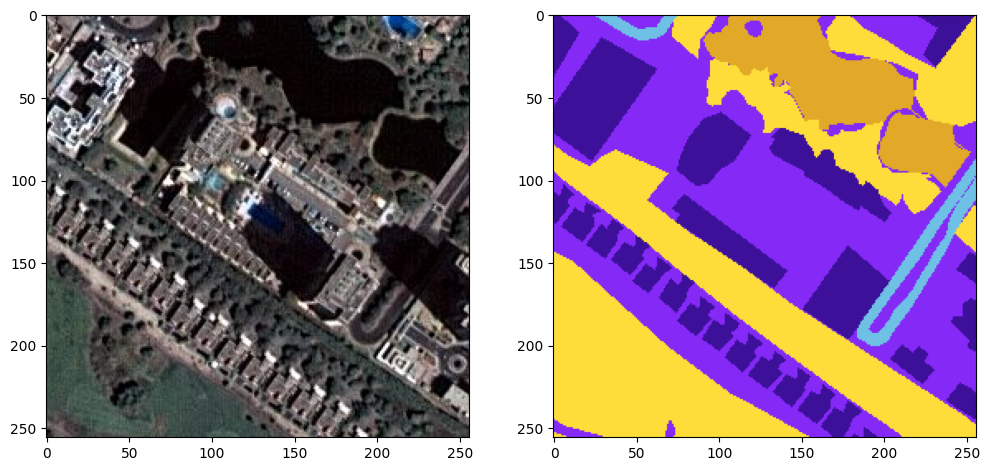

In [34]:
imageNumber =  random.randint(0, len(imageDataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(imageDataset[imageNumber], (patchSize, patchSize, 3)))
plt.subplot(122)
plt.imshow(np.reshape(maskDataset[imageNumber], (patchSize, patchSize, 3)))
plt.show()

## Convert RGB to HEX

In [35]:
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4)))

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4)))

Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4)))

Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4)))

Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4)))

Unlabeled = '#9B9B9B'.lstrip('#') 
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4)))

label = singePatchMask

In [37]:
def rgbTo2Dlabel(label):
    
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5
    
    label_seg = label_seg[:,:,0]
    
    return label_seg
    

In [39]:
labels = []
for i in range(maskDataset.shape[0]):
    label = rgbTo2Dlabel(maskDataset[i])
    labels.append(label)    

labels = np.array(labels)   
labels = np.expand_dims(labels, axis=3)
 

print("Unique labels in label dataset are: ", np.unique(labels))

Unique labels in label dataset are:  [0 1 2 3 4 5]


## Check images to confirm 

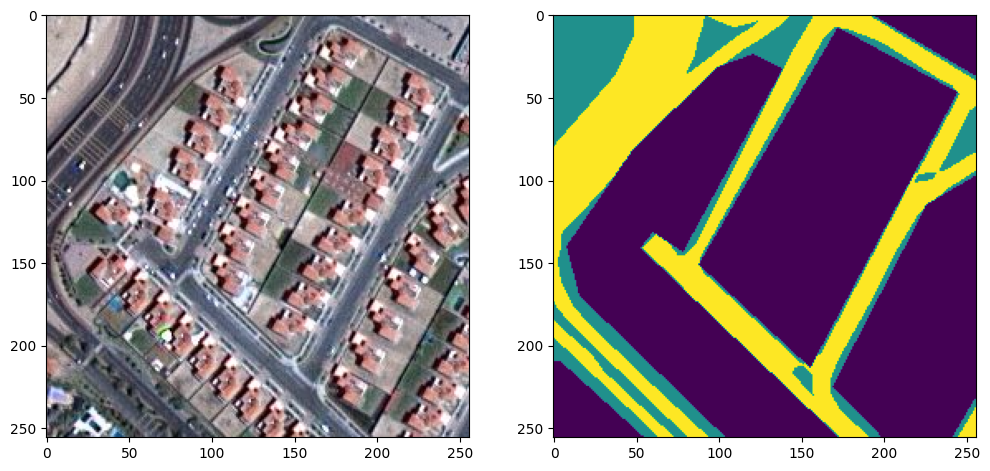

In [48]:
imageNumber = random.randint(0, len(imageDataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(imageDataset[imageNumber])
plt.subplot(122)
plt.imshow(labels[imageNumber][:,:,0])
plt.show()


## Labels to categorical

In [49]:
nClasses = len(np.unique(labels))
from keras.utils import to_categorical

In [50]:
labelsCategories = to_categorical(labels, num_classes=nClasses)

In [52]:
labelsCategories.shape

(1305, 256, 256, 6)

In [54]:
%env SM_FRAMEWORK=tf.keras
import segmentation_models as sm

env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


In [55]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(imageDataset, labelsCategories, 
                                               test_size=0.2, random_state=42)

In [63]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [64]:
weights

[0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [65]:
diceLoss = sm.losses.DiceLoss(class_weights=weights)
focalLoss = sm.losses.CategoricalFocalLoss()
totalLoss = diceLoss + (1 * focalLoss)

In [66]:
imgH = xTrain.shape[1]
imgW = xTrain.shape[2]
imgCh = xTrain.shape[3]

## uNET model

In [74]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras import backend as K

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)



################################################################
def multi_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.2)(c1)  # Original 0.1
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)  # Original 0.1
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)  # Original 0.1
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)  # Original 0.1
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    #model.summary()
    
    return model

In [75]:
metrics = ['accuracy', jacard_coef]

In [76]:
def getModel():
    return multi_unet_model(n_classes=nClasses, IMG_HEIGHT=imgH, IMG_WIDTH=imgW, IMG_CHANNELS=imgCh)

In [77]:
model = getModel()
model.compile(optimizer='adam', loss=totalLoss, metrics=metrics)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [78]:
model.input_shape

(None, 256, 256, 3)

## Training model

In [80]:
firstTraining = model.fit(xTrain, yTrain, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=2, 
                    validation_data=(xTest, yTest), 
                    shuffle=False)

Epoch 1/2
66/66 [==============================] - 498s 8s/step - loss: 0.9695 - accuracy: 0.6579 - jacard_coef: 0.3759 - val_loss: 0.9698 - val_accuracy: 0.6659 - val_jacard_coef: 0.3801
Epoch 2/2
66/66 [==============================] - 428s 6s/step - loss: 0.9591 - accuracy: 0.6997 - jacard_coef: 0.4287 - val_loss: 0.9618 - val_accuracy: 0.7126 - val_jacard_coef: 0.4632


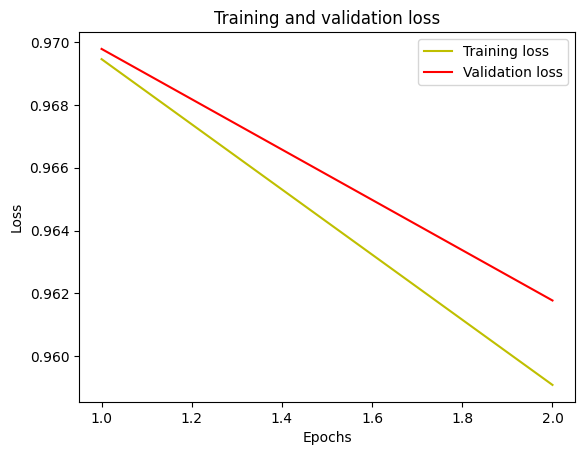

In [82]:
history = firstTraining
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [83]:
acc = history.history['jacard_coef']
val_acc = history.history['val_jacard_coef']

In [85]:
val_acc

[0.3800634443759918, 0.4632067084312439]

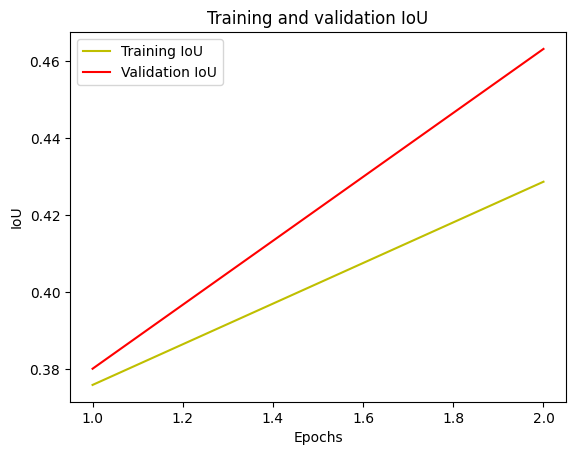

In [86]:
plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()

# Prediction

In [90]:
yPred = model.predict(xTest)
yPredArgMax = np.argmax(yPred, axis=3)
yTestArgMax = np.argmax(yTest, axis=3)

9/9 [==============================] - 21s 2s/step


In [142]:
testImgNumber = random.randint(0, len(xTest))
testImg = xTest[testImgNumber]
groundTruth=yTestArgMax[testImgNumber]
#test_img_norm=test_img[:,:,0][:,:,None]
testImgInput=np.expand_dims(testImg, 0)
prediction = (model.predict(testImgInput))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

1/1 [==============================] - 0s 162ms/step


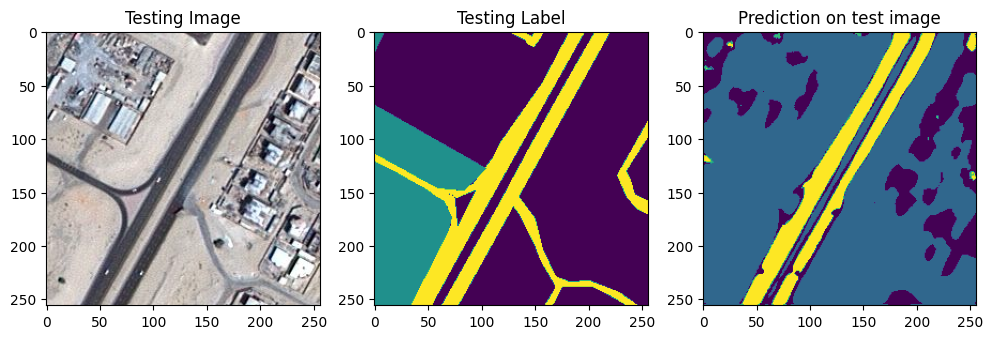

In [143]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(testImg)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(groundTruth)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()